<a href="https://colab.research.google.com/github/linesn/xmen/blob/main/xmen_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of the X-Men dataset



## Imports, environment set up

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
!pip install sklearn --upgrade

In [3]:
# PROGRESS BAR
from tqdm.notebook import tqdm

In [4]:
# FEATURE SELECTION
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [5]:
# CLASSIFIERS
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [6]:
# REGRESSORS
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

In [7]:
# GET ALL ESTIMATORS AT ONCE (Makes previous two cells superfluous)
from sklearn.utils import all_estimators

In [8]:
# NORMALIZERS
from sklearn.preprocessing import normalize, StandardScaler

In [9]:
# PLOTTING
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [10]:
from sklearn.model_selection import train_test_split

In [166]:
# METRICS
from sklearn.metrics import accuracy_score, auc, mean_squared_error

In [12]:
from scipy.stats import pointbiserialr

The following are not available by default in Colab, and may need to be pip installed.

In [13]:
try:
  import wikipedia
except:
  %pip install wikipedia
  import wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=79547d1fcc90ddbee3af88df199704955b9ff45c41841a131e515908c8a5d4f0
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [14]:
try:
  from umap import UMAP
except:
  %pip install umap-learn
  from umap import UMAP

try:
  from sentence_transformers import SentenceTransformer
  # from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
except:
  %pip install sentence-transformers
  # %pip install transformers
  from sentence_transformers import SentenceTransformer
  # from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 48.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=873d626d2eec5c84a189b7c066f0fe0a4ebe83ff80af6a6ad6952973fc61e5a8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=652b6f39f64713dc89e941eb49c0204b7503e80f3f2029105676f28c7f802722
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 78 kB 2.9 MB/s 
     |████████████████████████████████| 3.1 MB 11.1 MB/s 
     |████████████████████████████████| 3.3 MB 34.6 MB/s 
     |████████████████████████████████| 1.2 MB 42.6 MB/s 
     |████████████████████████████████| 61 kB 412 kB/s 
     |████████████████████

In [15]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
import os
if 'COLAB_GPU' in os.environ: # a hacky way of determining if you are in colab.
  print("Notebook is running in colab")
  from google.colab import drive
  drive.mount("/content/drive")
  DATA_DIR = "./drive/MyDrive/Data/"
  
else:
  # Get the system information from the OS
  PLATFORM_SYSTEM = platform.system()

  # Darwin is macOS
  if PLATFORM_SYSTEM == "Darwin":
      EXECUTABLE_PATH = Path("../dependencies/chromedriver")
  elif PLATFORM_SYSTEM == "Windows":
      EXECUTABLE_PATH = Path("../dependencies/chromedriver.exe")
  else:
      logging.critical("Chromedriver not found or Chromedriver is outdated...")
      exit()
  DATA_DIR = "../Data/raw/"

Notebook is running in colab
Mounted at /content/drive


### Visualization customization

In [17]:
plt.style.use('dark_background')

In [18]:
plotly_template = pio.templates["plotly_dark"]

## Data read in

In [19]:
character_viz = pd.read_csv(DATA_DIR+"/xmen/character_visualization.csv")
character = pd.read_csv(DATA_DIR+"/xmen/characters.csv")
comic_bechdel = pd.read_csv(DATA_DIR+"/xmen/comic_bechdel.csv")
xmen_bechdel = pd.read_csv(DATA_DIR+"/xmen/xmen_bechdel.csv")
covers = pd.read_csv(DATA_DIR+"/xmen/covers.csv")
collaborators = pd.read_csv(DATA_DIR+"/xmen/issue_collaborators.csv")
locations = pd.read_csv(DATA_DIR+"/xmen/locations.csv")
scores = pd.read_csv(DATA_DIR+"/xmen/CGC_Collectors_Scores.csv")

In [20]:
dfs = [
  character_viz, 
  character ,
  comic_bechdel,
  xmen_bechdel,
  covers,
  collaborators,
  locations,
  scores,
]
total_cells = 0
for df in dfs:
  total_cells += df.shape[0] * df.shape[1]
print(total_cells)

229010


## Collaborators

In [21]:
collaborators

,issue,editor_in_chief,editor,penciller
0,97,Marv Wolfman,NaN,Dave Cockrum
1,98,Marv Wolfman,NaN,Dave Cockrum
2,99,Marv Wolfman,NaN,Dave Cockrum
3,100,Marv Wolfman,NaN,Dave Cockrum
4,101,Archie Goodwin,NaN,Dave Cockrum
...,...,...,...,...
185,275,Tom Defalco,Tom Defalco,Jim Lee
186,276,Tom Defalco,Tom Defalco,Jim Lee
187,277,Tom Defalco,Tom Defalco,Jim Lee
188,278,Tom Defalco,Tom Defalco,Paul Smith


Now we'll make one-hot encoded dummy variables.

In [22]:
collaborators_dummies = pd.get_dummies(collaborators, columns=["editor_in_chief", "editor", "penciller"])

## Covers

In [23]:
covers = covers.fillna("")

In [24]:
covers

,issue,cover_artist,narrative_captions,characters_visualized,characters_speaking,dialog_text
0,97,Dave Cockrum,Cyclops vs. Havok -- In a duel to the death! M...,Cyclops\r\nHavok\r\nColossus\r\nStorm\r\nNight...,Storm,"Storm: ""Stay Back, my fellow X-Men!""\r\nStorm:..."
1,98,Dave Cockrum,The Sentinels are Back! 'Nuff Said!,Cyclops\r\nWolverine\r\nColossus\r\nStorm\r\nN...,,
2,99,Dave Cockrum,,Cyclops\r\nColossus\r\nBanshee\r\nNightcrawler...,Colossus,"Colossus: ""Even if we escape the energy-sphere..."
3,100,Dave Cockrum,X-Man vs. X-Man in a battle to the death -- be...,Cyclops\r\nJean Grey\r\nAngel\r\nBeast\r\nIcem...,,
4,101,Dave Cockrum,In the mutant heroes' hour of maximum peril… E...,Cyclops\r\nJean Grey\r\nStorm\r\nNightcrawler,,
...,...,...,...,...,...,...
179,276,Jim Lee,Execution,Wolverine\r\nProfessor X,,
180,277,Jim Lee,,Wolverine\r\nGambit,,
181,278,Paul Smith,In the grip of the Shadown King!,Rogue\r\nGuido,,
182,279,Andy Kubert,The Muir Island Saga Because you demanded it...,Colossus\r\nProfessor X\r\nStevie,,


In [25]:
all_cover_characters = []
for line in covers.characters_visualized:
  all_cover_characters += line.strip().split("\r\n")
all_cover_characters = list(set(all_cover_characters))
print(all_cover_characters)

['Kittty Pryde', 'Colossus ', 'Lady Deathstrike', 'Emma Frost/White Queen', 'Jean Grey/Dark Phoenix', 'Ant-man (Hank)', 'Sun God', 'Arcade', 'Alpha Flight Members', 'Dire Wraith x 5', 'Emma Frost', 'Avalanche', 'Unnamed woman', "M'Garai", 'Genoshans x 67', 'Storm x2', 'Vindicator/James MacDonald Hudson', "Aliens from Lilandra's home planet", 'Jubilee', 'Rogue', 'Hodge', 'Carol Danvers', 'Captain Marvel (Monica Rambeua)', 'Collosus', 'Power Pack Members(Julie, Jack, Katie, Alex)', 'Weapon Alpha', 'Nightcrawler/Bamf', 'Madelyne Pryor', 'Pyro', 'Spirit-voices x6', 'Sunder', 'Kitty Pryde/Pirate Kitty', 'Kulan Garth', 'StarJammers(all of them)', 'Barron Von Strucker', 'Lian Shen', 'Rsylocke', 'Empath', 'Bone Breaker', 'Ms.Marvel', 'Hellhound', 'Fenris (Andreas', 'Scalphunter', 'Lockeed the Dragon', 'Human Torch', 'Various Marvel Characters', 'Amphibus', 'Black Widow', 'Punchout', 'Polaris', 'Hard case', 'Mandarin', 'Unidentiable person', 'Lila Cheney', 'Sauron', 'Lorna Dane/Polaris', 'Madel

In [26]:
for char in tqdm(all_cover_characters):
  covers[f"cover_features_{char}"] = [1 if char in i else 0 for i in covers.characters_visualized]

  0%|          | 0/238 [00:00<?, ?it/s]

In [27]:
keep_columns = [f"cover_features_{char}" for char in all_cover_characters] + ["issue", "cover_artist"]
cover_predictors = pd.get_dummies(covers[keep_columns], columns=["cover_artist"])

In [28]:
#covers["all_text"] = covers[["cover_artist", "narrative_captions", "characters_visualized", "characters_speaking", "dialog_text"]].agg(" ".join, axis=1)
covers["all_text"] = covers[["narrative_captions", "characters_visualized", "characters_speaking", "dialog_text"]].agg(" ".join, axis=1)

In [29]:
covers.all_text[213-97]

' Wolverine\r\nSabertooth  '

In [30]:
cover_embeddings = model.encode(covers.all_text.to_numpy())

In [31]:
cover_embeddings.shape

(184, 768)

In [32]:
cover_umap_2d = UMAP(random_state=0)
cover_umap_2d.fit(cover_embeddings)
cover_projections = cover_umap_2d.transform(cover_embeddings)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [33]:
layout = dict(xaxis=dict(title='$U_1$',
                         linecolor='gray',
                         showgrid=True,
                         ),
              yaxis=dict(title='$U_2$',
                         linecolor='gray',
                         showgrid=True,
                         ),
)
data = go.Scatter(x=cover_projections[:,0],
                  y=cover_projections[:,1],
                  text=covers['issue'],
                  textposition='top right',
                  #textfont=dict(color=df_umap["colors"]),
                  mode='markers+text',
                  marker=dict(color=[list(covers['cover_artist'].unique()).index(a) for a in covers["cover_artist"]], size=8),
                  hovertext=covers[["issue", "cover_artist", "all_text"]].astype(str).agg(" ".join, axis=1),
                  name='Covers')

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_dark'
fig.show()
fig.write_html(DATA_DIR + "issues.html")

## Locations

In [34]:
locations[:10]

,issue,location,context,notes
0,97,Space,Dream,NaN
1,97,X-Mansion,Present,NaN
2,97,Rio Diablo Research Facility,Present,NaN
3,97,Kennedy International Airport,Present,NaN
4,97,Undisclosed Villain Location,Present,NaN
5,98,Rockefeller Centre,Present,NaN
6,98,Boat in the Bahama Out Islands,Present,NaN
7,98,Sentinel Space Station (former SHIELD Orbital ...,Present,NaN
8,98,X-Mansion,Present,NaN
9,98,Sentinel Space Station (former SHIELD Orbital ...,Present,NaN


In [35]:
locations.location.value_counts()[:15]

X-Mansion                                                  100
Danger Room                                                 27
Space                                                       19
Muir Island, Scotland                                       14
Unspecified region in Australia                             14
Eagle Plaza, Dallas Texas                                   11
Central Park                                                10
San Francisco                                               10
Morlock residence under New York                            10
Princess Lilandra's Home Planet                             10
The Savage Land                                             10
Sentinel Space Station (former SHIELD Orbital Platform)      9
Dallas                                                       9
Caribbean Island, Bermuda Triangle                           9
Cassidy Keep, Ireland                                        8
Name: location, dtype: int64

In [36]:
location_dummies = pd.get_dummies(locations[["issue", "location"]], columns=["location"]).groupby(["issue"]).sum()

## Bechdel tests

In [37]:
comic_bechdel

,series,issue,title,writer,artist,cover_artist,pass_bechdel,page_number,notes
0,Avengers,105,Head's up people! The Black Panther is back!!,Steve Englehart,NaN,John Buscema,yes,19,NaN
1,Avengers,106,A traitor stalks among us!,Steve Englehart,NaN,NaN,no,NaN,NaN
2,Avengers,107,The Grim Reaper is Back! --(and he's not alone!!),Steve Englehart,NaN,NaN,no,NaN,NaN
3,Avengers,108,Check -- and Mate!,Steve Englehart,NaN,NaN,no,NaN,NaN
4,Avengers,109,NaN,Steve Englehart,Don Heck,John Buscema,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...
303,Alpha Flight,24,Join them in the strangest journey ever-- Join...,John Byrne,NaN,John Byrne,yes,3,NaN
304,Alpha Flight,25,NaN,John Byrne,NaN,John Byrne,no,NaN,NaN
305,Alpha Flight,26,Defeated!,John Byrne,NaN,John Byrne,no,NaN,NaN
306,Alpha Flight,27,NaN,John Byrne,John Byne,John Byrne,no,NaN,NaN


In [38]:
xmen_bechdel

,issue,pass_bechdel,notes,reprint
0,1.0,no,NaN,False
1,2.0,no,NaN,False
2,3.0,no,NaN,False
3,4.0,no,NaN,False
4,5.0,yes,NaN,False
...,...,...,...,...
540,530.0,no,NaN,False
541,531.0,yes,NaN,False
542,532.0,yes,NaN,False
543,533.0,yes,NaN,False


In [39]:
xmen_bechdel["bechdel_binary"] = [1 if i=="yes" else 0 for i in xmen_bechdel.pass_bechdel]

## Character viz

In [40]:
character_viz

,issue,costume,character,speech,thought,narrative,depicted
0,97,Costume,Editor narration,0,0,0,0
1,97,Costume,Omnipresent narration,0,0,0,0
2,97,Costume,Professor X = Charles Xavier (no costume)*,0,0,0,0
3,97,Costume,Wolverine = Logan,7,0,0,10
4,97,Costume,Cyclops = Scott Summers,24,3,0,23
...,...,...,...,...,...,...,...
9795,292,Non-Costume,Moira MacTaggert (scientist helper)*,0,0,0,0
9796,292,Non-Costume,Havok = Alex Summers,0,0,0,0
9797,292,Non-Costume,Jubilee = Jubilation Lee,0,0,0,0
9798,292,Non-Costume,Forge = Name Unknown*,0,0,0,0


In [41]:
appearances = ["speech", "thought", "narrative", "depicted"]
for char in tqdm(character_viz.character.unique()):
  for appearance in appearances:
    character_viz[f"{appearance}_{char}"] = [character_viz[appearance][i] if character_viz["character"][i]==char else 0 for i in range(len(character_viz))]

  0%|          | 0/25 [00:00<?, ?it/s]

Collapse the character viz table to one row per issue.

In [42]:
good_columns = character_viz.columns.to_list()
for item in appearances + ["costume", "character"]:
  good_columns.remove(item)

In [43]:
character_viz_by_issue = character_viz[good_columns].groupby(["issue"]).sum()

# Collectors Scores

The following data was mined from the Certified Guaranty Company (CGC)'s comic registry. It represents the distribution of grades awarded to copies of each issue in the Claremont Run. Higher grades are considered more collectable, i.e. of greater value to collectors. This grading process is somewhat opaque, but it certainly includes as a feature the demand for the comic issue and the quality of the copy in question. By summing the rows we obtain the total number of grades issued, i.e. the number of collected copies certified by the CGC, which ought to roughly correlate with the number of issues sold of the comic. Furthermore, the issues with higher mean grades and higher total grades are more likely to have sold many copies *and* retained their popularity.

In [44]:
scores

,Slot Name,Comic Description,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.2,9.4,9.6,9.8,9.9,10
0,X-Men 94,X-Men,51,58,66,88,117,146,175,204,233,292,350,388,438,613,729,1225,1954,2917,4375,8750,14583,23333,29167,43750
1,X-Men 95,X-Men,5,6,7,9,12,15,18,21,24,30,36,40,45,63,75,125,200,298,447,894,1490,2384,2980,4470
2,X-Men 96,X-Men,3,3,4,5,7,9,10,12,14,17,20,23,26,36,43,71,114,170,255,510,850,1360,1700,2550
3,X-Men 97,X-Men,3,3,4,5,7,9,10,12,14,17,20,23,26,36,43,71,114,170,255,510,850,1360,1700,2550
4,X-Men 98,X-Men,3,3,4,5,7,9,10,12,14,17,20,23,26,36,43,71,114,170,255,510,850,1360,1700,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Uncanny X-Men 275,Uncanny X-Men,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,5,7,10,25,35,60,70,100
182,Uncanny X-Men 276,Uncanny X-Men,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,4,6,10,20,30,50,60,90
183,Uncanny X-Men 277,Uncanny X-Men,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,4,6,10,20,30,50,60,90
184,Uncanny X-Men 278,Uncanny X-Men,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,4,6,10,20,30,50,60,90


In [45]:
issues = [int(i.split()[-1]) for i in scores["Slot Name"]]

In [46]:
scores["issue"] = issues

In [47]:
grades = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.2,9.4,9.6,9.8,9.9,10]
str_grades = [str(i) for i in grades]
print(len(grades))

24


In [48]:
scores['totals'] = scores[str_grades].sum(axis=1)

In [49]:
values = [] 
for row in scores[str_grades].to_numpy():
  rvalue = 0
  for i in range(len(row)):
    rvalue += row[i] * grades[i]
  values.append(rvalue)

In [50]:
scores["values"] = values
scores["means"] = scores["values"]/scores["totals"]

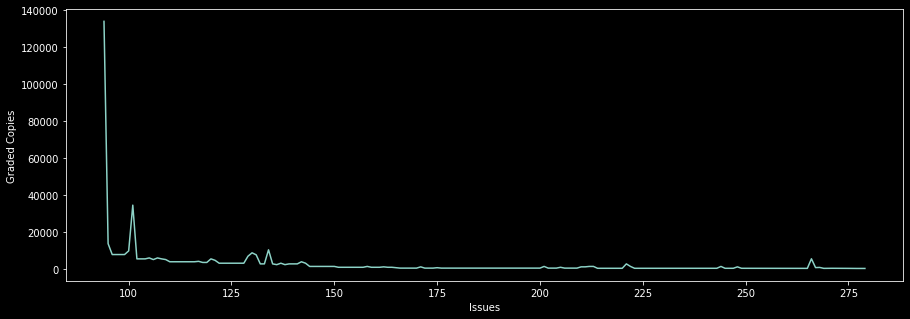

In [51]:
fig = figure(figsize=(15,5))
plot(scores["issue"], scores["totals"]);
xlabel("Issues");
ylabel("Graded Copies");

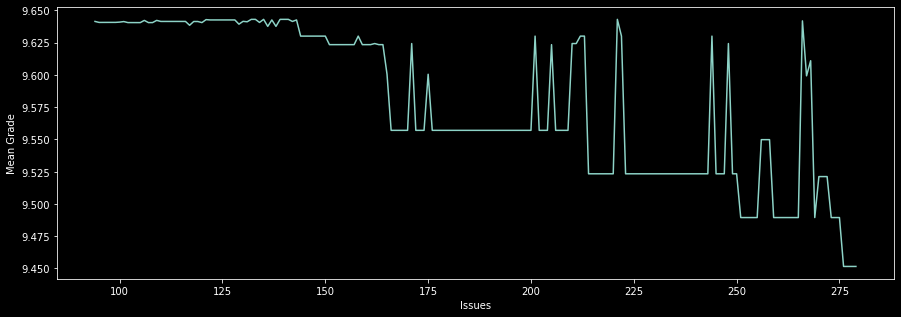

In [52]:
fig = figure(figsize=(15,5))
plot(scores["issue"], scores["means"]);
xlabel("Issues");
ylabel("Mean Grade");

It seems extremely suspicious that there are so many flat-lines in the plot of mean grade by issue. I suspect the data I was given uses some heuristic to fill in missing data or to label batches of issues within a given number range, rather than relying solely on a strict recording of grades awarded to each issue. Nevertheless, we'll go with what we have.

In [53]:
scores[scores["means"]>9.625]

,Slot Name,Comic Description,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.2,9.4,9.6,9.8,9.9,10,issue,totals,values,means
0,X-Men 94,X-Men,51,58,66,88,117,146,175,204,233,292,350,388,438,613,729,1225,1954,2917,4375,8750,14583,23333,29167,43750,94,134002,1291960.0,9.641349
1,X-Men 95,X-Men,5,6,7,9,12,15,18,21,24,30,36,40,45,63,75,125,200,298,447,894,1490,2384,2980,4470,95,13694,132018.2,9.640587
2,X-Men 96,X-Men,3,3,4,5,7,9,10,12,14,17,20,23,26,36,43,71,114,170,255,510,850,1360,1700,2550,96,7812,75312.5,9.640617
3,X-Men 97,X-Men,3,3,4,5,7,9,10,12,14,17,20,23,26,36,43,71,114,170,255,510,850,1360,1700,2550,97,7812,75312.5,9.640617
4,X-Men 98,X-Men,3,3,4,5,7,9,10,12,14,17,20,23,26,36,43,71,114,170,255,510,850,1360,1700,2550,98,7812,75312.5,9.640617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Uncanny X-Men 213,Uncanny X-Men,1,1,1,1,1,2,2,2,2,3,4,4,5,6,8,13,20,30,45,90,150,240,300,450,213,1381,13299.0,9.629978
127,Uncanny X-Men 221,Uncanny X-Men,1,1,1,2,2,3,4,4,5,6,7,8,9,13,15,25,40,60,90,180,300,480,600,900,221,2756,26576.0,9.642961
128,Uncanny X-Men 222,Uncanny X-Men,1,1,1,1,1,2,2,2,2,3,4,4,5,6,8,13,20,30,45,90,150,240,300,450,222,1381,13299.0,9.629978
150,Uncanny X-Men 244,Uncanny X-Men,1,1,1,1,1,2,2,2,2,3,4,4,5,6,8,13,20,30,45,90,150,240,300,450,244,1381,13299.0,9.629978


# Wikipedia data

In [54]:
result = wikipedia.search("uncanny x-men #100", results = 5)
result

['Uncanny X-Men',
 'Uncanny X-Men 94',
 'X-Men (TV series)',
 'List of X-Men comics',
 'Storm (Marvel Comics)']

In [55]:
page = wikipedia.page(result[1])

In [56]:
page.summary

'Uncanny X-Men, originally published as The X-Men, is an American comic book series published by Marvel Comics since 1963, and is the longest-running series in the X-Men comics franchise.  It features a team of superheroes called the X-Men, a group of mutants with superhuman abilities led and taught by Professor X.\nThe title was created by Stan Lee and Jack Kirby, met with a lukewarm reception, and was eventually cancelled in 1970.  Interest was rekindled with 1975\'s Giant-Size X-Men and the debut of a new, international team.  Under the guidance of David Cockrum and Chris Claremont, whose 16-year stint began with August 1975\'s Uncanny X-Men #94, the series grew in popularity worldwide, eventually spawning a franchise with numerous spin-off "X-books", including New Mutants, X-Factor, Excalibur, X-Force, Generation X, other flagship titles like the simply titled X-Men (later New X-Men & X-Men Legacy), Astonishing X-Men, All-New X-Men, Amazing X-Men, Extraordinary X-Men and X-Men Gold

# Fusing datasets

In [57]:
fused = pd.DataFrame()

Each dataframe has an `issue` column, but the entries vary. We want to work only with the intersections that we have full data coverage for.

In [58]:
issues_to_use = set(range(1,500))
for df in [xmen_bechdel, covers, scores, character, character_viz, collaborators]:
  issues_to_use = issues_to_use.intersection(set([int(i) for i in df["issue"]]))

In [59]:
issues_to_use = list(issues_to_use)
sort(issues_to_use)
print(issues_to_use)

[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]


In [60]:
fused["issue"] = issues_to_use

Fuse in the scores (labels).

In [61]:
fused = fused.merge(scores.loc[(scores["issue"] <= fused["issue"].max()) & (scores["issue"]  >= fused["issue"].min())][["totals", "issue"]])

Fuse in the Bechdel Test data.

In [62]:
fused = fused.merge(xmen_bechdel.loc[(xmen_bechdel["issue"] <= fused["issue"].max()) & (xmen_bechdel["issue"]  >= xmen_bechdel["issue"].min())][["issue", "bechdel_binary"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1127: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation



Fuse in the Character Visualization data.

In [63]:
fused = fused.merge(character_viz_by_issue, on="issue")

Fuse in the cover data.

In [64]:
fused = fused.merge(cover_predictors, on="issue")

Fuse in the collaborator data.

In [65]:
fused = fused.merge(collaborators_dummies, on="issue")

Fuse in the location data

In [66]:
fused = fused.merge(location_dummies, on="issue")

#### Drop empty and constant columns 

If we only wanted to drop columns that are all zero we'd just do this.

In [67]:
len(fused.columns)

1166

In [68]:
fused = fused.loc[:, (fused != 0).any(axis=0)]

In [69]:
len(fused.columns)

1153

However, I want to drop all constant columns. So we should run this.

In [70]:
 fused = fused.loc[:,fused.apply(pd.Series.nunique) != 1]
 print(len(fused.columns))

1153


But it gets worse: if we break into a test and train sets, any variable with only one observed occurance can't occur in both the test and train sets, so it is useless to us, therefore we can drop those columns with only one observation.

In [71]:
for i in range(3):
  print(f"columns with {i} events:")
  count = 0
  for column in fused.columns:
    if fused[column].sum()==i:
      #print(column)
      count += 1
  print(count)

columns with 0 events:
0
columns with 1 events:
698
columns with 2 events:
199


In [72]:
fused = fused.loc[:,fused.apply(pd.Series.sum) > 1]
print(len(fused.columns))

455


In [73]:
print(fused.shape[0])

199


# Analysis

## Predicting issue sales (sort of) by issue features
We don't have sales data, but we have the roughly related collectors data above.

### Split the data in test and train sets

In [74]:
train, test = train_test_split(fused, test_size=0.2, random_state=0)

In [75]:
X_columns = list(train.columns)
X_columns.remove("totals")

In [76]:
X_train = train[X_columns].to_numpy()
X_test = test[X_columns].to_numpy()
y_train = train["totals"].to_numpy()
y_test = test["totals"].to_numpy()

### Normalize

In [77]:
issue_scalar = StandardScaler()
issue_scalar.fit(X_train)
X_train_n = issue_scalar.transform(X_train)
X_test_n = issue_scalar.transform(X_test)

In [78]:
issue_scalar_noncentered = StandardScaler(with_mean=False,)
issue_scalar_noncentered.fit(X_train)
X_train_nn = issue_scalar_noncentered.transform(X_train)
X_test_nn = issue_scalar_noncentered.transform(X_test)

### Feature selection

In [79]:
feature_reductions = {}

In [80]:
n_obs, n_feat = X_train_n.shape
print(f"There are {n_obs} observations in {n_feat} features.")

There are 159 observations in 454 features.


#### Variance thresholding 
Drop columns that are static for more than $p$ percent of the rows (before normalization).

In [81]:
p = .01
sel = VarianceThreshold(threshold=(p * (1 - p)))

In [82]:
X_var_tranf = sel.fit_transform(X_train_n, y_train)

In [83]:
keeps = sel.get_support()

In [84]:
dropped = []
for i in range(len(X_columns)):
  if not keeps[i]:
    dropped.append(X_columns[i])
print(f"There are {len(dropped)} low-variance columns, including:")
print(dropped[:10])

There are 32 low-variance columns, including:
['cover_features_Emma Frost', 'cover_features_Rsylocke', 'cover_features_Storm Troops x7', 'location_Adirondack Forest, New York', 'location_Canadian Military/Alpha Flight Truck', 'location_Central Park, Manhattan', 'location_Citadel, Savage Land, Antarctica', 'location_Empire state building, Manhattan', 'location_Genosha', 'location_Harbor of Hong Kong']


In [85]:
kept_features = [i for i in X_columns if not i in dropped]
print(f"This leaves {len(kept_features)} features including:")
print(kept_features[:100])

This leaves 422 features including:
['issue', 'bechdel_binary', 'narrative_Editor narration', 'narrative_Omnipresent narration', 'speech_Professor X = Charles Xavier (no costume)*', 'thought_Professor X = Charles Xavier (no costume)*', 'narrative_Professor X = Charles Xavier (no costume)*', 'depicted_Professor X = Charles Xavier (no costume)*', 'speech_Wolverine = Logan', 'thought_Wolverine = Logan', 'narrative_Wolverine = Logan', 'depicted_Wolverine = Logan', 'speech_Cyclops = Scott Summers', 'thought_Cyclops = Scott Summers', 'narrative_Cyclops = Scott Summers', 'depicted_Cyclops = Scott Summers', 'speech_Marvel Girl/Phoenix = Jean Grey', 'thought_Marvel Girl/Phoenix = Jean Grey', 'narrative_Marvel Girl/Phoenix = Jean Grey', 'depicted_Marvel Girl/Phoenix = Jean Grey', 'speech_Storm = Ororo Munroe', 'thought_Storm = Ororo Munroe', 'narrative_Storm = Ororo Munroe', 'depicted_Storm = Ororo Munroe', 'speech_Colossus = Peter (Piotr) Rasputin', 'thought_Colossus = Peter (Piotr) Rasputin', 

#### L1 feature selection

In [275]:
lsvc = LinearSVC(C=0.01775, penalty="l1", dual=False).fit(X_train_n, y_train)

In [276]:
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train_n)
X_new.shape

(159, 39)

In [277]:
keepsl1 = model.get_support()
droppedl1 = []
for i in range(len(X_columns)):
  if not keepsl1[i]:
    droppedl1.append(X_columns[i])
print(f"There are {len(droppedl1)} low-variance columns, including:")
print(droppedl1[:10])
kept_featuresl1 = [i for i in X_columns if not i in droppedl1]
print(f"This leaves {len(kept_featuresl1)} features including:")
print(kept_featuresl1[:100])

There are 415 low-variance columns, including:
['issue', 'bechdel_binary', 'narrative_Editor narration', 'narrative_Omnipresent narration', 'speech_Professor X = Charles Xavier (no costume)*', 'thought_Professor X = Charles Xavier (no costume)*', 'narrative_Professor X = Charles Xavier (no costume)*', 'depicted_Professor X = Charles Xavier (no costume)*', 'speech_Wolverine = Logan', 'thought_Wolverine = Logan']
This leaves 39 features including:
['speech_Banshee = Sean Cassidy', 'depicted_Longshot = (unknown real name)', 'thought_Moira MacTaggert (scientist helper)*', 'depicted_Havok = Alex Summers', 'thought_Jubilee = Jubilation Lee', 'cover_features_Jubilee', 'cover_features_Forge', 'cover_features_Snowbird', 'cover_features_Sabertooth', 'cover_features_Jean Grey/Marvel Girl', 'cover_features_Sentinels (x2)', 'cover_features_Dr.Doom', 'cover_features_Christopher Summers/Corsair', 'cover_artist_John Romita', 'cover_artist_Marc Silvestri', 'cover_artist_Rick Leonardi', 'cover_artist_un

In [278]:
feature_reductions["L1"] = set(kept_featuresl1)

#### Lasso selection

In [279]:
llasso = LassoCV().fit(X_train_n, y_train)
model = SelectFromModel(llasso, prefit=True)
X_new = model.transform(X_train)
print("Number of features:", X_new.shape[1])
keepslasso = model.get_support()
droppedlasso = []
for i in range(len(X_columns)):
  if not keepslasso[i]:
    droppedlasso.append(X_columns[i])
print(f"There are {len(droppedlasso)} low-variance columns, including:")
print(droppedlasso[:10])
kept_features_lasso = [i for i in X_columns if not i in droppedlasso]
print(f"This leaves {len(kept_features_lasso)} features including:")
print(kept_features_lasso[:100])

Number of features: 39
There are 415 low-variance columns, including:
['bechdel_binary', 'narrative_Omnipresent narration', 'speech_Professor X = Charles Xavier (no costume)*', 'thought_Professor X = Charles Xavier (no costume)*', 'narrative_Professor X = Charles Xavier (no costume)*', 'depicted_Professor X = Charles Xavier (no costume)*', 'speech_Wolverine = Logan', 'thought_Wolverine = Logan', 'narrative_Wolverine = Logan', 'depicted_Wolverine = Logan']
This leaves 39 features including:
['issue', 'narrative_Editor narration', 'thought_Marvel Girl/Phoenix = Jean Grey', 'speech_Angel = Warren Worthington', 'thought_Ariel/Sprite/Shadowcat = Kitty Pryde', 'speech_Rogue = Name Unknown', 'speech_Gambit = Name Unknown', 'depicted_Gambit = Name Unknown', 'cover_features_Professor Xavier', 'cover_features_Banshee', 'cover_features_Captain America', 'cover_features_Sabertooth', 'cover_features_Sebastain Shaw', 'cover_artist_John Romita', 'cover_artist_Paul Smith', 'cover_artist_uncredited', '

In [280]:
feature_reductions["Lasso"] = set(kept_features_lasso)

#### Chi-Square selection

In [281]:
chi = SelectKBest(chi2, k=39,)
chi.fit(X_train_nn, y_train)

features = train[X_columns].columns.to_list()
sorted_features = sorted(features, key=lambda x:chi.pvalues_[features.index(x)], reverse=False)
sorted_probs = sorted(nan_to_num(chi.pvalues_, 1), reverse=False)

for i in range(15):
  print(sorted_features[i], sorted_probs[i])

thought_Gambit = Name Unknown 0.0
cover_features_Sunfire 0.0
speech_Gambit = Name Unknown 0.0
depicted_Gambit = Name Unknown 0.0
narrative_Cyclops = Scott Summers 0.0
cover_features_Harry Leland 0.0
cover_features_Jubilee 0.0
thought_Moira MacTaggert (scientist helper)* 0.0
speech_Psylocke = Elizabeth (Betsy) Braddock 0.0
narrative_Professor X = Charles Xavier (no costume)* 0.0
thought_Cyclops = Scott Summers 0.0
thought_Jubilee = Jubilation Lee 0.0
thought_Marvel Girl/Phoenix = Jean Grey 0.0
cover_features_Angel 0.0
speech_Angel = Warren Worthington 0.0


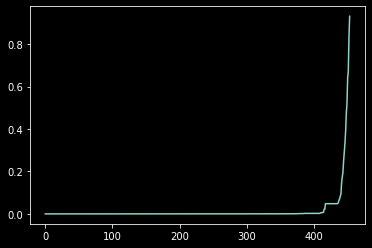

In [282]:
plot(sorted_probs);

In [283]:
kept_featureschi = sorted_features[:39]

In [284]:
feature_reductions["Chi-Square"] = set(kept_featureschi)

#### ANOVA f-value K-Best features

In [285]:
k_best = SelectKBest(k=39,)
#k_best_max = SelectKBest(k=X_train_n.shape[0])
k_best_max = SelectKBest(k=39)

In [286]:
k_best.fit(X_train_n, y_train)
k_best_max.fit(X_train_n, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 88  92  97 139 161 167 190 207 222 226 227 230 241 248 258 260 265 268
 274 279 286 289 295 300 304 308 342 344 345 349 354 370 371 373 376 378
 381 387 388 389 403 407 410 411 419 425 426 436 442] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 88  92  97 139 161 167 190 207 222 226 227 230 241 248 258 260 265 268
 274 279 286 289 295 300 304 308 342 344 345 349 354 370 371 373 376 378
 381 387 388 389 403 407 410 411 419 425 426 436 442] are constant.

/usr/local/lib/python3.7/

SelectKBest(k=39)

In [287]:
features = train[X_columns].columns.to_list()
sorted_features = sorted(features, key=lambda x:k_best_max.pvalues_[features.index(x)], reverse=False)
sorted_probs = sorted(nan_to_num(k_best_max.pvalues_, 1), reverse=False)

for i in range(15):
  print(sorted_features[i], sorted_probs[i])

thought_Gambit = Name Unknown 0.0
cover_features_Sunfire 0.0
speech_Gambit = Name Unknown 0.0
depicted_Gambit = Name Unknown 0.0
issue 0.0
speech_Psylocke = Elizabeth (Betsy) Braddock 0.0
depicted_Banshee = Sean Cassidy 0.0
thought_Cyclops = Scott Summers 0.0
depicted_Psylocke = Elizabeth (Betsy) Braddock 0.0
depicted_Marvel Girl/Phoenix = Jean Grey 0.0
narrative_Cyclops = Scott Summers 0.0
depicted_Longshot = (unknown real name) 0.0
speech_Banshee = Sean Cassidy 0.0
depicted_Cyclops = Scott Summers 0.0
speech_Cyclops = Scott Summers 0.0


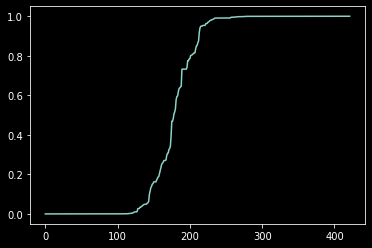

In [288]:
plot(sort(k_best_max.pvalues_));

In [289]:
kept_features_kb = k_best_max.get_feature_names_out(features)
feature_reductions["K-Best"] = set(kept_features_kb)

#### Comparing feature selection techniques

In [290]:
feature_selection_df = pd.DataFrame()
feature_selection_df["Technique"] = feature_reductions.keys()
feature_selection_df["Size"] = [len(i) for i in feature_reductions.values()]
feature_selection_df

,Technique,Size
0,L1,39
1,Chi-Square,39
2,K-Best,39
3,Lasso,39


In [291]:
intersections = zeros([len(feature_reductions)]*2)
n = len(feature_reductions)
keys = list(feature_reductions.keys())
for i in range(n):
  for j in range(n):
    iname = keys[i]
    jname = keys[j]
    if intersections[i,j] == 0:
      inter = len(list(feature_reductions[iname].intersection(feature_reductions[jname])))
      intersections[i,j] = inter
      intersections[j,i] = inter
    else:
      pass
print(intersections)

[[39.  6.  6.  9.]
 [ 6. 39.  5.  4.]
 [ 6.  5. 39. 17.]
 [ 9.  4. 17. 39.]]


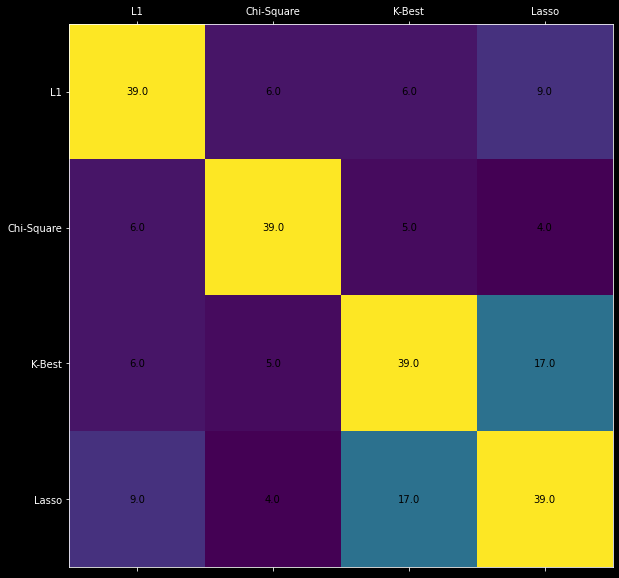

In [292]:
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.matshow(intersections)
for y in range(intersections.shape[0]):
   for x in range(intersections.shape[1]):
      text(x, y, intersections[y, x],
         horizontalalignment='center',
         verticalalignment='center',
         color="black",
      )
ax.set_xticklabels(['']+list(feature_reductions.keys()))
ax.set_yticklabels(['']+list(feature_reductions.keys()));

In [293]:
feature_intersection = set(kept_featuresl1).intersection(set(kept_features))

In [294]:
print(f"Out of the {len(kept_featuresl1)} features from L1 selection and the {len(kept_features)} from variance thresholding, they share {len(feature_intersection)} features.")

Out of the 39 features from L1 selection and the 422 from variance thresholding, they share 39 features.


#### Some Principle Component Analysis
Let's run a PCA over the remaining features to identify the ones that capture the most variance.

In [295]:
min_num_features = min([len(i) for i in feature_reductions.values()])
print(min_num_features)

39


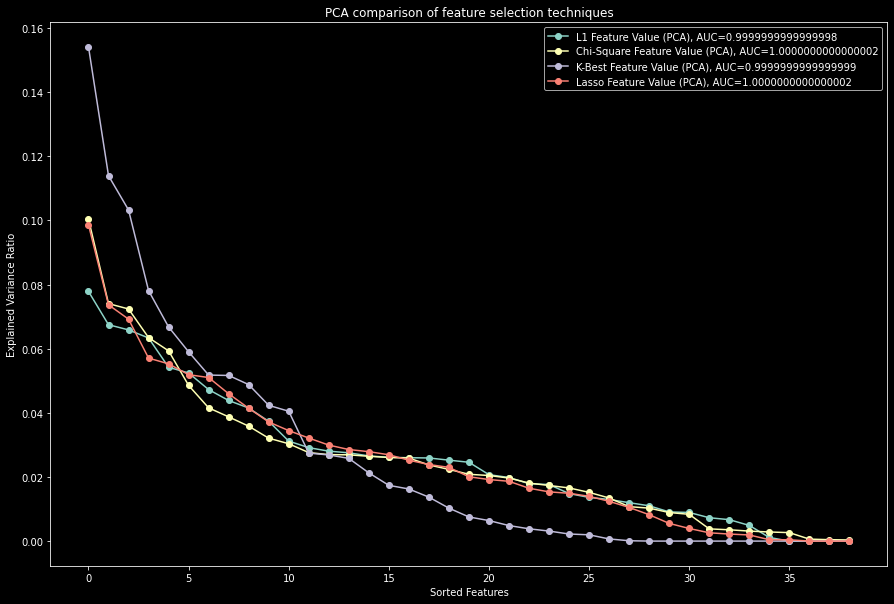

In [302]:
aucs = []
fig, ax = subplots(nrows=1,ncols=1, sharex=True, figsize=(15,10))
i = 0
for reduction in feature_reductions:
  X_reduced = train[feature_reductions[reduction]].to_numpy()
  X_reduced = issue_scalar.fit_transform(X_reduced)
  pca = PCA(n_components=X_reduced.shape[1])
  pca.fit(X_reduced)
  #print(pca.explained_variance_ratio_)
  ax.set_ylabel("Explained Variance Ratio");
  ax.set_xlabel("Sorted Features");
  current_auc = sum(pca.explained_variance_ratio_[:min_num_features])
  #auc(range(1,min_num_features+1), pca.explained_variance_ratio_[:min_num_features])
  ax.plot(pca.explained_variance_ratio_[:min_num_features], "-o", label=f"{reduction} Feature Value (PCA), AUC={current_auc}");
  aucs.append(current_auc)
  i+=1
ax.set_title("PCA comparison of feature selection techniques");
legend();

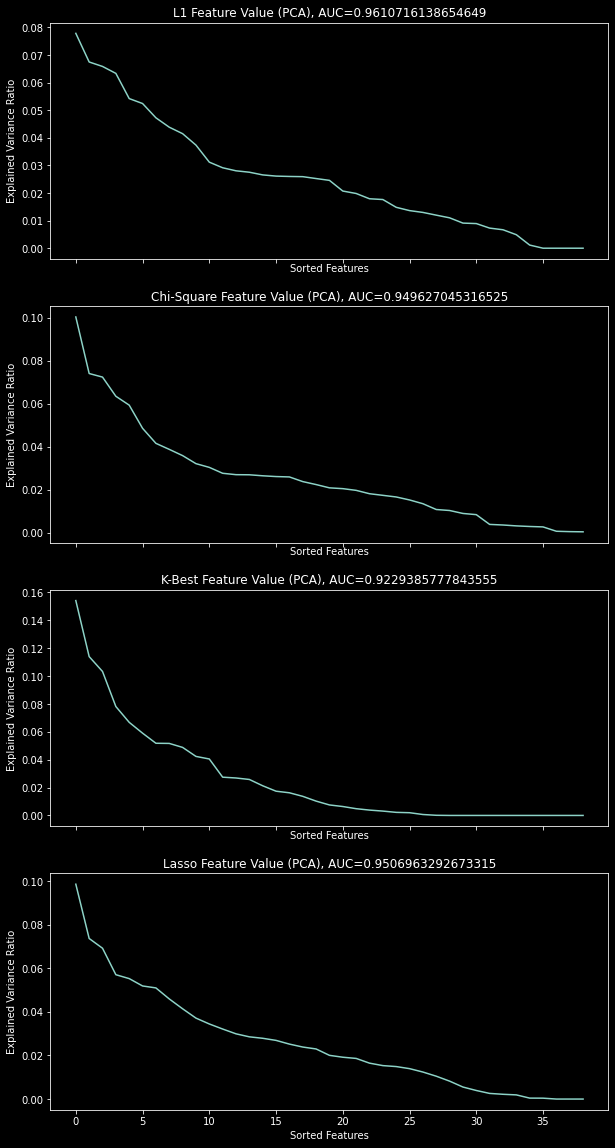

In [297]:
aucs = []
fig, ax = subplots(nrows=len(feature_reductions),ncols=1, sharex=True, figsize=(10,20))
i = 0
for reduction in feature_reductions:
  X_reduced = train[feature_reductions[reduction]].to_numpy()
  X_reduced = issue_scalar.fit_transform(X_reduced)
  pca = PCA(n_components=X_reduced.shape[1])
  pca.fit(X_reduced)
  #print(pca.explained_variance_ratio_)
  ax[i].set_ylabel("Explained Variance Ratio");
  ax[i].set_xlabel("Sorted Features");
  ax[i].plot(pca.explained_variance_ratio_[:min_num_features]);
  current_auc = auc(range(min_num_features), pca.explained_variance_ratio_[:min_num_features])
  aucs.append(current_auc)
  ax[i].set_title(f"{reduction} Feature Value (PCA), AUC={current_auc}");
  i+=1

It looks like the Lasso feature selection did the best, and we can restrict ourselves to its 39 features without losing too much variance.

In [356]:
feature_reductions["Lasso"]

{'cover_artist_John Romita',
 'cover_artist_Paul Smith',
 'cover_artist_uncredited',
 'cover_features_Banshee',
 'cover_features_Captain America',
 'cover_features_Professor Xavier',
 'cover_features_Sabertooth',
 'cover_features_Sebastain Shaw',
 'depicted_Gambit = Name Unknown',
 'editor_Marv Wolfman',
 'editor_in_chief_Archie Goodwin',
 'editor_in_chief_Marv Wolfman',
 'issue',
 'location_Baxter Building',
 'location_Blackbird, towards X-Mansion',
 'location_Boat, Drake Passage, South of Cape Horn',
 'location_Cassidy Keep, Ireland',
 'location_Circus Wagon in Orbit',
 'location_Disco, Delano Street, Lower Manhattan',
 'location_Downtown Calgary, Alberta',
 'location_Downtown Calgary, Alberta, Canada',
 'location_Hollywood Mall',
 "location_Jean Grey's Apartment, Greenwich Village, NYC",
 'location_Jinguchi Maru Ship, Drake Passage, South of Cape Horn',
 "location_Magneto's Underground Base, Antarctica",
 'location_Morlock residence under New York',
 'location_Pryde Residence, Deerf

In [298]:
X_reduced = train[feature_reductions["Lasso"]].to_numpy()
X_reduced = issue_scalar.fit_transform(X_reduced)
pca = PCA()
X_reduced = pca.fit_transform(X_reduced)

In [299]:
X_test_reduced = test[feature_reductions["Lasso"]].to_numpy()
X_test_reduced = issue_scalar.transform(X_test_reduced)
X_test_reduced = pca.transform(X_test_reduced)

### Apply Regression
We're going to try ALL THE REGRESSORS!

In [300]:
estimators = all_estimators(type_filter='regressor')
# Some regressors require initial arguments, we'll skip those for now.
all_regs = []
all_names = []
for name, RegressorClass in estimators:
    try:
        #print('Appending', name)
        reg = RegressorClass()
        all_regs.append(reg)
        all_names.append(name)
    except Exception as e:
        #print(e)
        pass

In [301]:
names = []
working_regs = []
reg_error = []
reg_time = []
pairs = zip(all_names, all_regs)
for name, reg in tqdm(pairs):
  print(name)
  try:
    start = time.time()
    reg.fit(X_reduced, y_train)
    end = time.time()
    reg_time.append(end - start)
    y_hat = reg.predict(X_test_reduced)
    reg_error.append(mean_squared_error(y_hat, y_test))
    names.append(name)
    working_regs.append(reg)
  except: 
    print("regressor not working")

0it [00:00, ?it/s]

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor


/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:252: FutureWarning:

As of version 0.24, n_components(2) should be in [1, min(n_features, n_samples, n_targets)] = [1, 1]. n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.



GammaRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
regressor not working
KNeighborsRegressor
KernelRidge
Lars


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



/usr/local/lib/python3.7/dist-p

LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repro

MultiTaskElasticNet
regressor not working
MultiTaskElasticNetCV
regressor not working
MultiTaskLasso
regressor not working
MultiTaskLassoCV
regressor not working
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
QuantileRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
Ridge
RidgeCV
SGDRegressor
SVR
TheilSenRegressor
TransformedTargetRegressor
TweedieRegressor


In [187]:
reg_results = pd.DataFrame()
reg_results["Regressor"] = names
reg_results["RMS Error"] = reg_error
reg_results["Training Time"] = reg_time

In [188]:
len(working_regs)

46

In [189]:
reg_results.sort_values(by="RMS Error")

,Regressor,RMS Error,Training Time
13,GradientBoostingRegressor,2.155837e+07,0.213638
5,DecisionTreeRegressor,2.261139e+07,0.003671
38,RandomForestRegressor,2.420683e+07,0.348037
34,PoissonRegressor,2.552872e+07,0.024114
9,ExtraTreeRegressor,2.566686e+07,0.001899
1,AdaBoostRegressor,2.580544e+07,0.187369
14,HistGradientBoostingRegressor,2.596108e+07,0.132078
2,BaggingRegressor,2.622593e+07,0.039828
10,ExtraTreesRegressor,2.633739e+07,0.213345
7,ElasticNet,2.662209e+07,0.000705


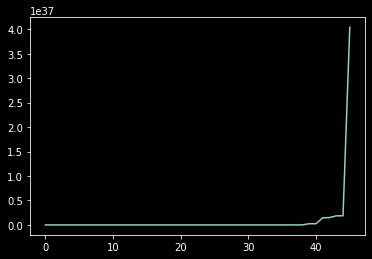

In [190]:
plot(reg_results.sort_values(by="RMS Error")["RMS Error"].to_list());

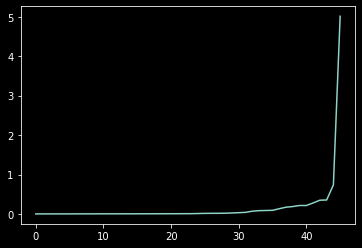

In [191]:
plot(reg_results.sort_values(by="Training Time")["Training Time"].to_list());

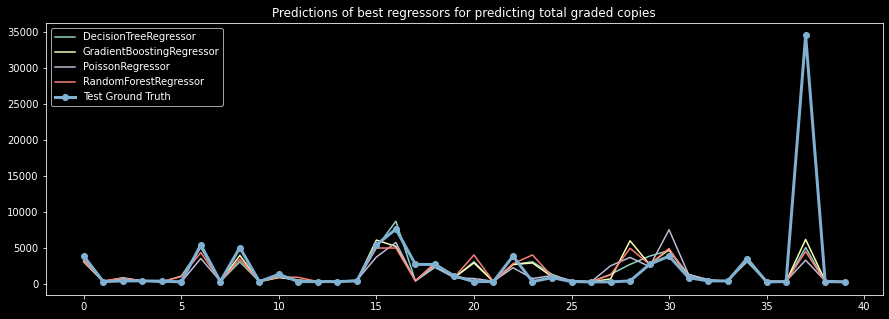

In [195]:
figure(figsize=(15,5))
for i in reg_results[reg_results["RMS Error"]<(2.56*10**7)].index:
  y_hat = working_regs[i].predict(X_test_reduced)
  plot(y_hat, label=names[i]);
plot(y_test, "-o", linewidth=3, label="Test Ground Truth");
legend();
title("Predictions of best regressors for predicting total graded copies");

Let's view the test set in chronological order.

In [193]:
issues = test.issue.to_list()
sissues = sorted(issues)

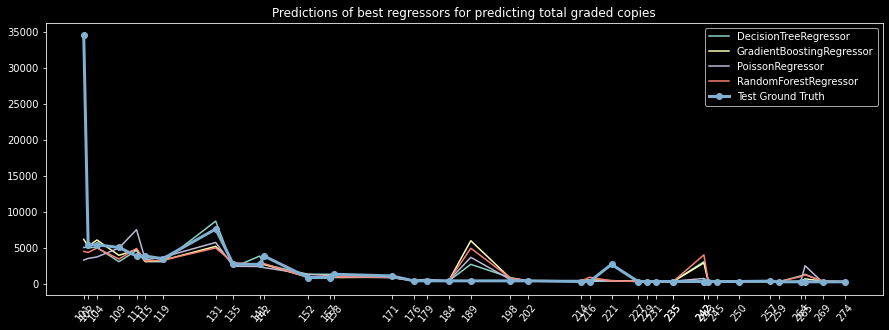

In [196]:
y_test_plot = [x for _,x in sorted(zip(issues, y_test))]
fig, ax = subplots(figsize=(15,5))
for i in reg_results[reg_results["RMS Error"]<(2.56*10**7)].index:
  y_hat = [x for _,x in sorted(zip(issues, working_regs[i].predict(X_test_reduced)))]
  ax.plot(sissues, y_hat, label=names[i]);
ax.plot(sissues, y_test_plot, "-o", linewidth=3, label="Test Ground Truth");
ax.legend();
ax.set_title("Predictions of best regressors for predicting total graded copies");
ax.set_xticks(sissues);
ax.tick_params(axis="x", rotation=50);

## Feature Extraction and Issue Recommendations

In [324]:
all = pd.concat([train, test])

In [339]:
all.shape

(199, 455)

In [325]:
X_all = concatenate((X_reduced, X_test_reduced))

In [326]:
X_all.shape

(199, 39)

In [327]:
issue_umap_2d = UMAP(random_state=0)
issue_umap_2d.fit(X_all)
issue_projections = issue_umap_2d.transform(X_all)

In [355]:
layout = dict(xaxis=dict(title='$U_1$',
                         linecolor='gray',
                         showgrid=True,
                         ),
              yaxis=dict(title='$U_2$',
                         linecolor='gray',
                         showgrid=True,
                         ),
)
data = go.Scatter(x=issue_projections[:,0],
                  y=issue_projections[:,1],
                  hovertext=all['issue'],
                  hovertemplate='Issue %{hovertext}',
                  textposition='top right',
                  mode='markers+text',
                  marker=dict(color=all["issue"], size=log(all["totals"]), symbol=all["bechdel_binary"]),
                  #hovertext=all[["issue"]].astype(str),
                  name='Issues',
                  #showlegend=True,
                  )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    hoverlabel_align = 'right',
    title = "Issue feature similarity embedding")

fig.layout.template = 'plotly_dark'
fig.show()
fig.write_html(DATA_DIR + "issues.html")

## Bechdel Tests and Total Certifications
We were curious to see if there was a strong correlation between an issue's passing the Bechdel Test and measures of its collectibility. Because the Bechdel test is a binary (dichotomous) variable, we'll need to use [Point-Biserial Correlation](https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient), which generalizes Pearson's correlation to this case.

In [117]:
corrdf = xmen_bechdel.merge(scores[["totals", "values", "means", "issue"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1117: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation



In [118]:
pbr = pointbiserialr(corrdf["bechdel_binary"], corrdf["totals"])
pbr

PointbiserialrResult(correlation=-0.20774070887558152, pvalue=0.003481162222889501)

In [119]:
pbr = pointbiserialr(corrdf["bechdel_binary"], corrdf["values"])
pbr

PointbiserialrResult(correlation=-0.20777602295393516, pvalue=0.0034754913496014015)

In [120]:
pbr = pointbiserialr(corrdf["bechdel_binary"], corrdf["means"])
pbr

PointbiserialrResult(correlation=-0.1683174123819658, pvalue=0.01836275487156914)

## Character deep dive
Let's take a look at what we can uncover related to the `character` dataframe.

In [121]:
all_characters = character.character.unique()

In [122]:
character.character.value_counts()

Nightcrawler = Kurt Wagner               183
Dazzler = Alison Blaire                  183
Rogue = Name Unknown                     183
Mystique = Name Unknown                  183
Storm = Ororo Munroe                     183
Moira MacTaggert (scientist helper)      183
Gambit = Name Unknown                    183
Colossus = Peter (Piotr) Rasputin        183
Havok = Alex Summers                     183
Angel = Warren Worthington               183
Cyclops = Scott Summers                  183
Professor X                              183
Binary/Ms Marvel = Carol Danvers         183
Longshot = (unknown real name)           183
Jubilee = Jubilation Lee                 183
Psylocke = Elizabeth (Betsy) Braddock    183
Forge = Name Unknown                     183
Magneto = Erik Magnus                    183
Banshee = Sean Cassidy                   183
Ariel/Sprite/Shadowcat = Kitty Pryde     183
Phoenix(2) = Rachel Summers              183
Wolverine = Logan                        183
Marvel Gir

In [123]:
character.shared_bed_with_which_character.unique()

array([nan])

In [124]:
character.shared_room_domestically_with_which_character.unique()

array([nan])

This dataframe shows 23 important characters, and for each issue details whether certain things happened. Many of these features are relationship-focused (e.g. shared room with). 

## Character prediction (classification)
One possible task we might be interested in is classifying a character given a set of observations of their behavior in a new comic issue. Some features will be better than others at predicting that. Let's take a look at which features are most meaningful.

In [125]:
character.shape

(4209, 34)

In [126]:
character.drop(["character", "issue"], axis=1).fillna(0).columns

Index(['rendered_unconcious', 'captured', 'declared_dead', 'redressed',
       'depowered', 'clothing_torn', 'subject_to_torture', 'quits_team',
       'surrenders', 'number_of_kills_humans', 'number_of_kills_non_humans',
       'initiates_physical_conflict', 'expresses_reluctance_to_fight',
       'on_a_date_with_which_character', 'kiss_with_which_character',
       'hand_holding_with_which_character', 'dancing_with_which_character',
       'flying_with_another_character', 'arm_in_arm_with_which_character',
       'hugging_with_which_character', 'physical_contact_other',
       'carrying_with_which_character', 'shared_bed_with_which_character',
       'shared_room_domestically_with_which_character',
       'explicitly_states_i_love_you_to_whom', 'shared_undress',
       'shower_number_of_panels_shower_lasts',
       'bath_number_of_panels_bath_lasts', 'depicted_eating_food',
       'visible_tears_number_of_panels', 'visible_tears_number_of_intances',
       'special_notes'],
      dty

In [127]:
character[character.number_of_kills_non_humans!=0]

,issue,character,rendered_unconcious,captured,declared_dead,redressed,depowered,clothing_torn,subject_to_torture,quits_team,surrenders,number_of_kills_humans,number_of_kills_non_humans,initiates_physical_conflict,expresses_reluctance_to_fight,on_a_date_with_which_character,kiss_with_which_character,hand_holding_with_which_character,dancing_with_which_character,flying_with_another_character,arm_in_arm_with_which_character,hugging_with_which_character,physical_contact_other,carrying_with_which_character,shared_bed_with_which_character,shared_room_domestically_with_which_character,explicitly_states_i_love_you_to_whom,shared_undress,shower_number_of_panels_shower_lasts,bath_number_of_panels_bath_lasts,depicted_eating_food,visible_tears_number_of_panels,visible_tears_number_of_intances,special_notes
24,98,Wolverine = Logan,0,1,0,0,0,0,0,0,0,0,2,1,NaN,NaN,NaN,NaN,NaN,Banshee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
26,98,Marvel Girl/Phoenix = Jean Grey,1,1,0,0,0,0,1,0,0,0,1,NaN,NaN,Cyclops,Cyclops,NaN,NaN,captor (sentinels),Cyclops,NaN,Cyclops,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
30,98,Banshee = Sean Cassidy,0,1,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,Wolverine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
48,99,Cyclops = Scott Summers,1,1,0,0,0,0,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
50,99,Storm = Ororo Munroe,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colossus,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
51,99,Colossus = Peter (Piotr) Rasputin,0,0,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Storm,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
52,99,Nightcrawler = Kurt Wagner,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
70,100,Wolverine = Logan,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jean Grey,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
392,114,Wolverine = Logan,0,0,1,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
511,119,Colossus = Peter (Piotr) Rasputin,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Storm,NaN,Nightcrawler,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN


In [128]:
character.drop(["character", "issue"], axis=1).fillna(0).sum()

rendered_unconcious                              2.570000e+02
captured                                         1.420000e+02
declared_dead                                    4.700000e+01
redressed                                        4.700000e+01
depowered                                        9.000000e+01
clothing_torn                                    1.230000e+02
subject_to_torture                               1.500000e+01
quits_team                                       3.000000e+00
surrenders                                       2.000000e+00
number_of_kills_humans                           2.700000e+01
number_of_kills_non_humans                       5.000000e+09
expresses_reluctance_to_fight                    2.000000e+01
shared_bed_with_which_character                  0.000000e+00
shared_room_domestically_with_which_character    0.000000e+00
shower_number_of_panels_shower_lasts             1.700000e+01
bath_number_of_panels_bath_lasts                 7.000000e+00
depicted

In [129]:
character.drop(["character", "issue"], axis=1).fillna(0).std()

rendered_unconcious                              2.520391e-01
captured                                         1.831866e-01
declared_dead                                    1.073302e-01
redressed                                        1.116707e-01
depowered                                        1.495204e-01
clothing_torn                                    1.833139e-01
subject_to_torture                               5.959811e-02
quits_team                                       2.669119e-02
surrenders                                       2.179586e-02
number_of_kills_humans                           1.099027e-01
number_of_kills_non_humans                       7.706915e+07
expresses_reluctance_to_fight                    6.877694e-02
shared_bed_with_which_character                  0.000000e+00
shared_room_domestically_with_which_character    0.000000e+00
shower_number_of_panels_shower_lasts             9.618599e-02
bath_number_of_panels_bath_lasts                 4.075207e-02
depicted

In [130]:
df = character.fillna(0)
dfX = pd.get_dummies(df.drop(["character", "issue", "shared_bed_with_which_character", "shared_room_domestically_with_which_character"], axis=1))
X = dfX.to_numpy()
scaler = StandardScaler() 
X_normal = normalize(X, axis=0)
X = scaler.fit_transform(X)

In [131]:
y = character.character.to_numpy()

In [132]:
df_char_0 = pd.get_dummies(dfX)
df_char_0["character"] = df["character"]
df_char = df_char_0.groupby(['character']).aggregate(sum)
df_char_X = df_char # .drop(["issue"], axis=1)
X_char = normalize(df_char_X.to_numpy(), axis=0)
df_char_y = df_char.index.to_numpy()

In [133]:
df_char_X.columns

Index(['rendered_unconcious', 'captured', 'declared_dead', 'redressed',
       'depowered', 'clothing_torn', 'subject_to_torture', 'quits_team',
       'surrenders', 'number_of_kills_humans',
       ...
       'special_notes_*While Sleazoid is in control of Body',
       'special_notes_*While being posessed by Berserker **Anumber of planets with unspecified populations',
       'special_notes_*While body in control of Carol Danvers',
       'special_notes_*While under Genoshan  mind control',
       'special_notes_*While under Genoshan midcontrol',
       'special_notes_*While under mind control',
       'special_notes_*While under mind control of Eric the Red',
       'special_notes_*in dream', 'special_notes_*in hallucination',
       'special_notes_Storm'],
      dtype='object', length=913)

In [134]:
alliegance = ["Antagonist", "X-Men", "Superhero friend"]
alliance = [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
color_options = ["white", "lightsteelblue", "yellow"]
colors = [color_options[i] for i in alliance]
df_char["colors"] = colors
df_char["alliegance"] = [alliegance[i] for i in alliance]

PCA shows that the variance is pretty widely spread throughout the features.

In [135]:
X.shape

(4209, 913)

In [136]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
PCA(n_components=X.shape[1])
#print(pca.explained_variance_ratio_)

PCA(n_components=913)

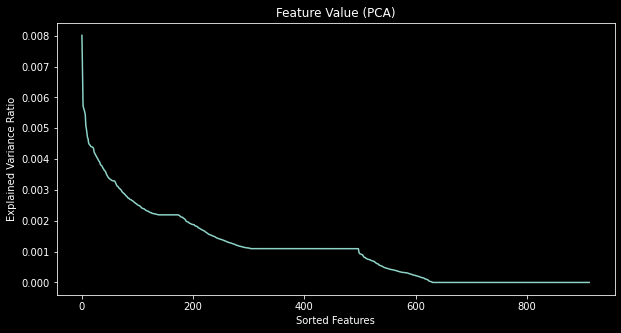

In [137]:
figure(figsize=(10,5))
title("Feature Value (PCA)")
ylabel("Explained Variance Ratio")
xlabel("Sorted Features")
plot(pca.explained_variance_ratio_)

In [138]:
dfX.corr().fillna(0)

,rendered_unconcious,captured,declared_dead,redressed,depowered,clothing_torn,subject_to_torture,quits_team,surrenders,number_of_kills_humans,number_of_kills_non_humans,expresses_reluctance_to_fight,shower_number_of_panels_shower_lasts,bath_number_of_panels_bath_lasts,depicted_eating_food,visible_tears_number_of_panels,visible_tears_number_of_intances,initiates_physical_conflict_0,initiates_physical_conflict_1,initiates_physical_conflict_1*,initiates_physical_conflict_2,initiates_physical_conflict_2*,initiates_physical_conflict_3*,on_a_date_with_which_character_0,on_a_date_with_which_character_1,on_a_date_with_which_character_Amanda Sefton,on_a_date_with_which_character_Banshee,on_a_date_with_which_character_Colossus,on_a_date_with_which_character_Cyclops,on_a_date_with_which_character_David Ishima,on_a_date_with_which_character_Gabrielle Haller,on_a_date_with_which_character_Jean Grey,on_a_date_with_which_character_Madelyn Pryor,on_a_date_with_which_character_Madelyne Pryor,on_a_date_with_which_character_Moira MacTaggert,on_a_date_with_which_character_Polaris,on_a_date_with_which_character_Storm,on_a_date_with_which_character_With local women in the savage land**,kiss_with_which_character_0,kiss_with_which_character_Amanda Sefton,...,special_notes_*In physic hallucination **In phsyic attack induced memory,special_notes_*In silhouette but implied to be cyclops through context,special_notes_*Kulan Gath alters reality including characters outfit,special_notes_*Nightcrawler from alternate future,special_notes_*On cheek,special_notes_*On cheek ** In Rachel Summer's memory of alternate past ***As Infant,special_notes_*On cheek **In body of Storm,special_notes_*On forhead,special_notes_*Once in a childhood flashback\r\n**Panic attack renders her unable to fight\r\n*** In a childhood flashback,special_notes_*One in flashback,special_notes_*Panel from priot issue **While Emma Frost is in body of Storm ***While Storm is im body of Emma Frost,special_notes_*Powers innefective against cousin,special_notes_*Psychically taking form of Jean Grey,special_notes_*Psychically taking form of jean Grey,special_notes_*Psycically believes in in another outfit,special_notes_*Psycically believes is in another outfit,special_notes_*Psycically is made to believe in other outfit,"special_notes_*Refers to as ""beloved""",special_notes_*Repition panel from previous issue,special_notes_*Skrull in for of Storm,special_notes_*Storm from alternate future **After her costume was torn a change of clothing left for her by a future version of self,special_notes_*Storm from alternate future *Nightcrawler from alternate future,special_notes_*Stuck permanently phasing,"special_notes_*Twice with Banshee, once when she is concious, once when she is unconcious","special_notes_*Twice, once when she is concious, once when she is unconcious",special_notes_*Unclear how many hellfire guards murdered but at lwast one,special_notes_*While Carol Danvers in control of Rogue body,special_notes_*While Carol Danvers in control of Rogue's body,special_notes_*While Carol Danvers in control of Rogues,special_notes_*While Carol Danvers in control of body,special_notes_*While Sleazoid is in control of Body,special_notes_*While being posessed by Berserker **Anumber of planets with unspecified populations,special_notes_*While body in control of Carol Danvers,special_notes_*While under Genoshan mind control,special_notes_*While under Genoshan midcontrol,special_notes_*While under mind control,special_notes_*While under mind control of Eric the Red,special_notes_*in dream,special_notes_*in hallucination,special_notes_Storm
rendered_unconcious,1.000000,0.176698,0.088992,0.102420,0.261729,0.161968,0.064613,-0.006471,0.037977,0.011594,-0.003735,0.065514,-0.010175,0.059522,0.138968,0.119906,0.116540,-0.195362,0.173381,0.015833,0.076506,0.023124,0.057436,-0.068066,0.023124,-0.003735,0.057436,-0.003735,0.037977,0.057436,0.057436,0.037977,-0.003735,-0.003735,-0.003735,-0.003735,-0.003735,-0.00373

In [139]:
X.shape

(4209, 913)

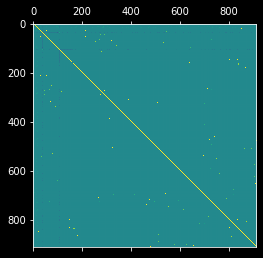

In [140]:
matshow(corrcoef(X.transpose()));

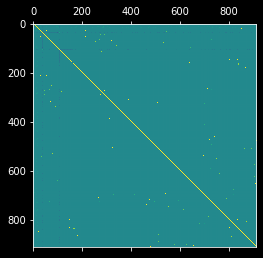

In [141]:
matshow(dfX.corr().fillna(0).to_numpy());

Let's find the most important features using chi-squared scores.

In [142]:
ft = SelectKBest(chi2, k="all",)
ft10 = SelectKBest(chi2, k=10)

In [143]:
ft.fit(X_normal,y)
ft10.fit(X_normal,y)

SelectKBest(score_func=<function chi2 at 0x7f7a875da710>)

In [144]:
X_new = ft10.fit_transform(X_normal, y)

The most character-predictive feature are various relationship details.

In [145]:
dfX.columns[ft.pvalues_.argmin()]

'kiss_with_which_character_Lilandra'

In [146]:
features = dfX.columns.to_list()
sorted_features = sorted(features, key=lambda x:ft.pvalues_[features.index(x)], reverse=False)
sorted_probs = sorted(nan_to_num(ft.pvalues_, 1), reverse=False)

In [147]:
for i in range(10):
  print(sorted_features[i], sorted_probs[i])

kiss_with_which_character_Lilandra 0.00017052411825610754
kiss_with_which_character_Cyclops 0.0007528980132742618
arm_in_arm_with_which_character_Jean Grey 0.003546600428116298
hugging_with_which_character_Madelyn Pryor 0.003546600428116298
arm_in_arm_with_which_character_Kitty Pryde 0.0035466004281163076
kiss_with_which_character_Banshee 0.003546600428116324
special_notes_*While Carol Danvers in control of body 0.003546600428116351
arm_in_arm_with_which_character_Cyclops 0.017220958977352242
kiss_with_which_character_Forge 0.01783044378153273
physical_contact_other_Carol Danvers 0.01783044378153273


The figure below makes it clear that features with a probability score below about .5 are useless.

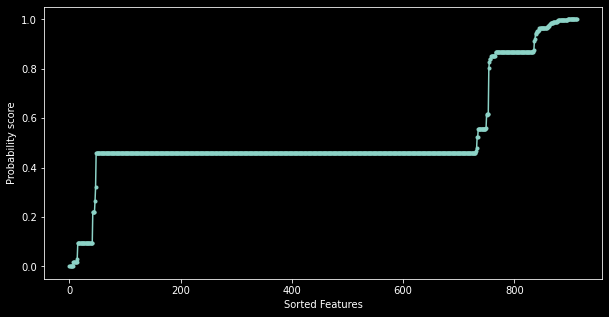

In [148]:
figure(figsize=(10,5))
plot(sorted_probs, ".-");
xlabel("Sorted Features");
ylabel("Probability score");

In [149]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    #"QDA",
]



classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(,),
    #QuadraticDiscriminantAnalysis(),
]

SyntaxError: ignored

## Using Dimensionality Reduction to compare/cluster characters
This will capture which characters have the most similar relationship data.

In [ ]:
df_char_X.columns

In [ ]:
umap_2d = UMAP(random_state=0)
umap_2d.fit(X_char)
#umap_2d.fit(df_char_X.drop(["colors", "alliegance"], axis=1))
#projections = umap_2d.transform(df_char_X.drop(["colors", "alliegance"], axis=1))
projections = umap_2d.transform(X_char)

In [ ]:
df_umap = pd.DataFrame.from_records(projections)
df_umap["Character"] = df_char_y
df_umap["Alliegence"] = [alliegance[i] for i in alliance]
df_umap["colors"] = colors

The outcome is that the villains are close to each other, at least.

In [ ]:
fig = px.scatter(
    df_umap, x=0, y=1,
    color=alliance, labels={'name': df_char_y},
    hover_data=["Character", "Alliegence"],
)
fig.show()

In [ ]:
df_umap.columns

In [ ]:
layout = dict(#plot_bgcolor='white',
              # margin=dict(t=20, l=20, r=20, b=20),
              xaxis=dict(title='$U_1$',
                          #range=[0.9, 5.5],
                          linecolor='gray',
                          showgrid=True,
              ),
              #            mirror=True),
              yaxis=dict(title='$U_2$',
                         #range=[95.5, 99.5],
                         linecolor='gray',
                         showgrid=True,
              #           mirror=True))
              ),
)

data = go.Scatter(x=df_umap[0],
                  y=df_umap[1],
                  text=df_umap['Character'],
                  textposition='top right',
                  textfont=dict(color=df_umap["colors"]),
                  mode='markers+text',
                  marker=dict(color=df_umap["colors"], size=8),
                  name='Characters')

fig = go.Figure(data=data, layout=layout)
fig.layout.template = 'plotly_dark'
fig.write_html(DATA_DIR + "/characters.html")
fig.show()

In [ ]:
! ls $DATA_DIR

In [ ]:
character_viz[character_viz.depicted!=0].character.value_counts()

In [ ]:
character_viz